## Module 4:

## Team Members:
Nolan Nguyen and Trey Hancock

## Project Title:
Modeling Measles Outbreak Dynamics with the SIR Model and Python



## Project Goal:
The goal of this project is to analyze the dynamics of a measles outbreak by fitting and evaluating the SIR epidemiological model using real-world case data from Nigeria, in order to estimate key transmission and recovery parameters and assess how well the model captures the observed spread of the disease.

## Disease Background:

Using your assigned disease, fill in the following bullet points. 

* Prevalence & incidence
    - In 2023, an estimated 10.3 million people were infected with measles worldwide. - In 2023, there were 663,795 reported measles cases, making the incidence rate 91 per 1,000,000 - https://www.cdc.gov/mmwr/volumes/73/wr/mm7345a4.htm
    - In 2023, in Nigeria, there were 184 measles outbreaks with 11,433 confirmed cases.
    - 64.9 out of 1 million children get infected with Measles in Nigeria.https://www.sciencedirect.com/science/article/pii/S2949916X24000768?

* Economic burden
    - In the US, the average cost to the system for a single case is over $40,000 (https://publichealth.jhu.edu/ivac/2025/estimating-the-financial-costs-of-measles-outbreaks)
    - In Nigeria, the estimated cost of inpatient treatment was $10.50. The average cost of outpatient treatment was $2.43. (https://pmc.ncbi.nlm.nih.gov/articles/PMC9302492/)

* Risk factors (genetic, lifestyle) & Societal determinants
    - Genes have influence on measles susceptibility. Specifically, the Human Leukocyte Antigen genes can makes some people "non-responders" to the measles vaccine. - https://pmc.ncbi.nlm.nih.gov/articles/PMC3570049/
    - Malnutrition, especially vitamin A deficiency, increases risk of severe measles diseases
    - Crowded living enviornments increase transmission risk (https://pubmed.ncbi.nlm.nih.gov/39164020/)
    -Lower socio-economic status, lower educational attainment, and poverty correlate with lower vaccination coverage and higher measles outbreak risk - https://www.mdpi.com/2076-393X/11/5/926
* Symptoms
    - High fever
    - Cough 
    - Runny nose, and red, watery eyes
    - Koplik spots: small white lesions on the inside of the cheeks
    - Rash: red, starting at the hairline, going to the face, trunk, and limbs; lasts about 5-6 days
    - https://www.cdc.gov/measles/signs-symptoms/index.html
    
* Diagnosis
    - Clinical diagnosis is based on fever, generalized maculpapular rash, and at least one of the three C's: cough, coryza (runny nose), and conjunctivitis (inflmmation of the thin membrane covering the white part of your eye,  "red eyes")
    - Koplik spots on cheek support clinical suspicion
    - Measles-specific IgM antibody testing is the standard diagnostic test
    - RT-PCR testing of throat, nasopharyngeal, or unrine samples can detect measles RNA
    - https://www.cdc.gov/measles/hcp/index.html

* Biological mechanisms (anatomy, organ physiology, cell & molecular physiology)
    - Measles virus enters through respiratory tract or conjunctiva when a person inhales infectious droplets
    Initial replication occurs in respiratory epithelial cells and local lymphoid tissues (eg. tonsils)
    - Virus then spreads through bloodstream to multiple organs
    - In the respiratory system, measles infects immune cells and airway epithelial cells, causing the cough and airway irritation
    - In the skin, infeceted immune cells move into dermal tissue and transfer virus to epithelial cells, creating the rash.
    - Measles causes immunosupression in the immune system
    - The measles virus is an enveloped (wrapped in a lipid membrane), single strand of RNA.
    - https://www.mdpi.com/1999-4915/8/8/210

## Dataset: 

*(Describe the data set you will analyze. Cite the source(s) of the data. Describe how the data was collected -- What techniques were used? What units are the data measured in? Etc.)*

For Nigerian population size as of 2020
* https://data.who.int/countries/566

For infectious period
* https://www.cdc.gov/measles/hcp/communication-resources/clinical-diagnosis-fact-sheet.html

         date  confirmed_cases
0  2020-08-03             25.0
1  2020-08-10             29.0
2  2020-08-17             27.0
3  2020-08-24             20.0
4  2020-08-31             17.0
         date        S_est  I_est  R_est
0  2020-08-03  213999975.0   25.0    0.0
1  2020-08-10  213999946.0   54.0    0.0
2  2020-08-17  213999919.0   81.0    0.0
3  2020-08-24  213999899.0  101.0    0.0
4  2020-08-31  213999882.0  118.0    0.0
5  2020-09-07  213999849.0  151.0    0.0
6  2020-09-14  213999805.0  195.0    0.0
7  2020-09-21  213999771.0  229.0    0.0
8  2020-09-28  213999739.0  236.0   25.0
9  2020-10-05  213999711.0  235.0   54.0
10 2020-10-12  213999687.0  232.0   81.0
11 2020-10-19  213999659.0  240.0  101.0
12 2020-10-26  213999630.0  252.0  118.0
13 2020-11-02  213999601.0  248.0  151.0
14 2020-11-09  213999573.0  232.0  195.0
         date        S_est   I_est    R_est
60 2021-09-27  213990231.0  1364.0   8405.0
61 2021-10-04  213990086.0  1349.0   8565.0
62 2021-10-11  213989930.0

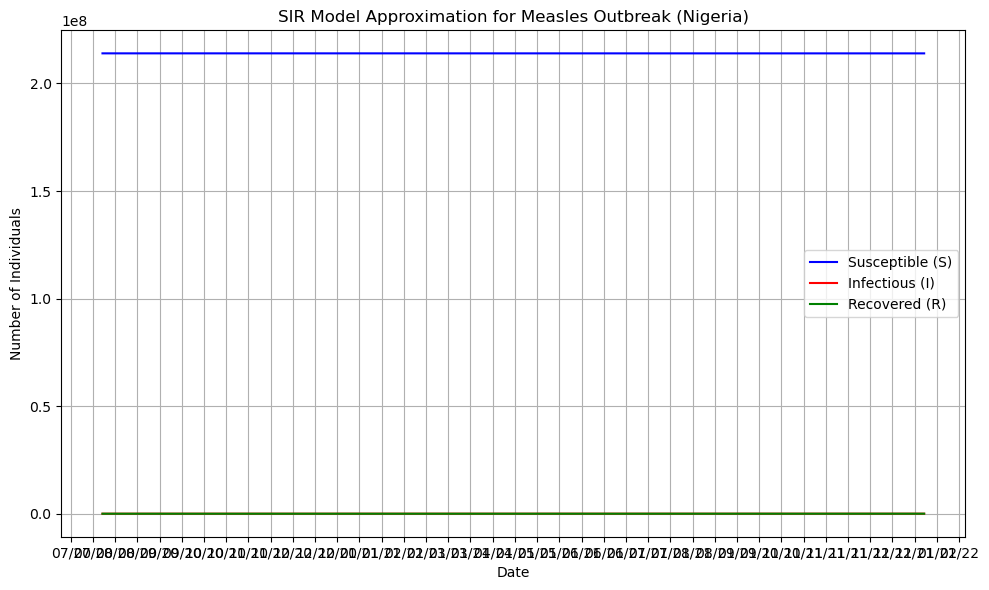

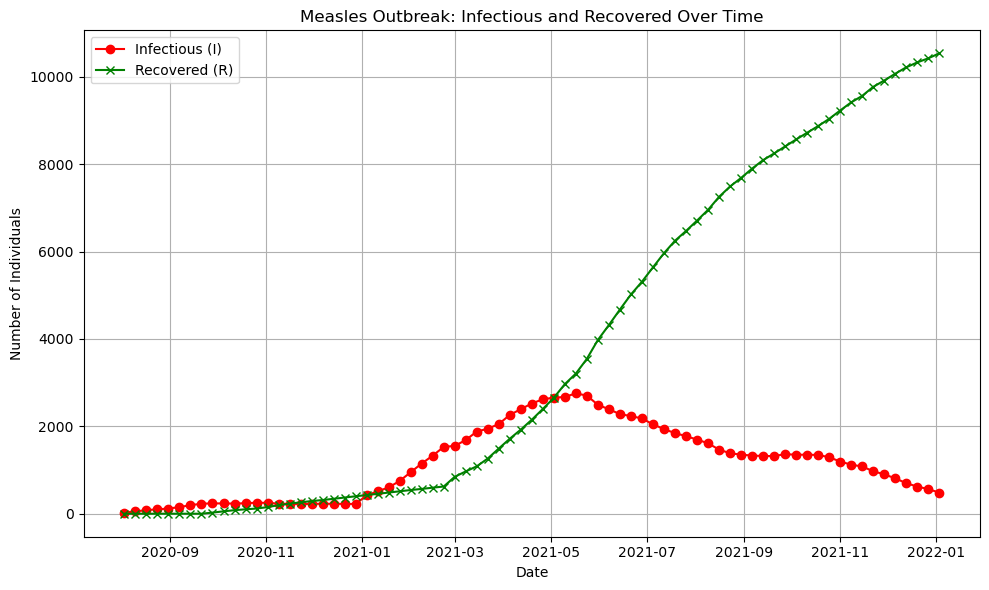

In [75]:
## LOAD YOUR DATASET HERE.

# 1. Read in the csv file of cumulative cases.
# 2. Use the convert_cumulative_to_SIR function to convert cumulative cases to approximate S, I, R at any given time.
# 3. Plot S, I, R over time.

from main_functions import convert_cumulative_to_SIR
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 1. Load the measles epidemiological data (update path as appropriate)
data = pd.read_csv('measles_nigeria_data_2020-2021_new_cases.csv')
print(data.head())

# Make sure date column is a datetime type
data['date'] = pd.to_datetime(data['date'])

# 2. Calculate cumulative confirmed cases (if your data is incidence)
data['cumulative_cases'] = data['confirmed_cases'].cumsum()

# 3. Use convert_cumulative_to_SIR (adjust infectious_period if needed)
population = 214_000_000  # example population, replace with actual as needed
infectious_period = 8     # 4 days before rash and 4 days after
data_sir = convert_cumulative_to_SIR(
    data,
    date_col='date',
    cumulative_col='cumulative_cases',
    population=population,
    infectious_period=infectious_period,
    new_case_col='confirmed_cases',
    I_col='I_est',
    R_col='R_est',
    S_col='S_est'
)
print(data_sir[['date', 'S_est', 'I_est', 'R_est']].head(15))
print(data_sir[['date', 'S_est', 'I_est', 'R_est']].tail(15))  # to check later points

# Optionally, check if any of the infectious or recovered numbers ever increase:
print(data_sir[['I_est', 'R_est']].describe())  # Look for non-zero ranges
# 4. Plot S, I, R over time (full SIR plot)
plt.figure(figsize=(10, 6))
plt.plot(data_sir['date'], data_sir['S_est'], label='Susceptible (S)', color='blue')
plt.plot(data_sir['date'], data_sir['I_est'], label='Infectious (I)', color='red')
plt.plot(data_sir['date'], data_sir['R_est'], label='Recovered (R)', color='green')
plt.xlabel('Date')
plt.ylabel('Number of Individuals')
plt.title('SIR Model Approximation for Measles Outbreak (Nigeria)')
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%y'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. **Additional plot for visual clarity: Infectious (I) and Recovered (R) only**
plt.figure(figsize=(10, 6))
plt.plot(data_sir['date'], data_sir['I_est'], label='Infectious (I)', color='red', marker='o')
plt.plot(data_sir['date'], data_sir['R_est'], label='Recovered (R)', color='green', marker='x')
plt.xlabel('Date')
plt.ylabel('Number of Individuals')
plt.title('Measles Outbreak: Infectious and Recovered Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Data Analyis: 

### Methods

*IN A SUMMARY, DESCRIBE THE METHODS YOU USED TO ANALYZE AND MODEL THE DATA.*


### Analysis
*(Describe how you analyzed the data. This is where you should intersperse your Python code so that anyone reading this can run your code to perform the analysis that you did, generate your figures, etc.)*

### Finding a fitted beta and gamma value to find basic reproduction number

In [76]:
import numpy as np
from main_functions import euler_sir

# total population
N = 214_000_000

# time grid: one step per row in your dataset
t = np.arange(len(data_sir))   # 0,1,2,... same length as I_est

# initial conditions
S0 = data_sir['S_est'].iloc[0]
I0 = data_sir['I_est'].iloc[0]
R0 = data_sir['R_est'].iloc[0]

obs_I = data_sir['I_est'].values

def run_model_and_SSE(params):
    beta, gamma = params
    S_model, I_model, R_model = euler_sir(beta, gamma, S0, I0, R0, t, N)
    return np.sum((I_model - obs_I)**2)

from scipy.optimize import minimize

gamma_guess = 1/7
beta_guess  = 15 * gamma_guess

result = minimize(
    run_model_and_SSE,
    x0=[beta_guess, gamma_guess],
    bounds=[(0, None), (0, None)]
)

beta_hat, gamma_hat = result.x
print("Fitted beta:", beta_hat)
print("Fitted gamma:", gamma_hat)
print("R0 estimate:", beta_hat / gamma_hat)


Fitted beta: 1.7370700587561478
Fitted gamma: 1.676116273773527
R0 estimate: 1.0363660838668385


### Plotting the I(t) based on fitted values and literature values

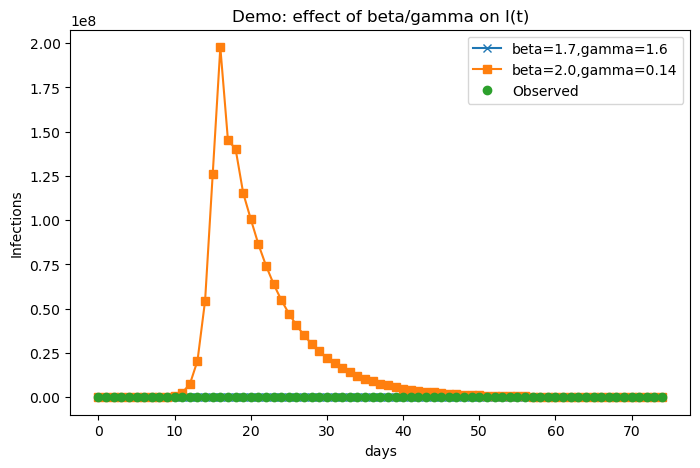

MSE for (beta1,gamma1): 54170953.89582853
MSE for (beta2,gamma2): 2016596062489895.8


In [77]:
import matplotlib.pyplot as plt
import numpy as np
from main_functions import euler_sir

# 1. Observed I(t) and time array
I_obs = data_sir['I_est'].values.astype(float)
t_obs = np.linspace(0, len(I_obs) - 1, len(I_obs))   # 1 unit = 1 day (or 1 week, just be consistent)

# 2. Initial conditions from first row
I0_obs = data_sir.iloc[0]['I_est']
R0_obs = data_sir.iloc[0]['R_est']   # or 0.0 if you want to match the demo
S0_obs = N - I0_obs - R0_obs

# 3. Pick two (beta, gamma) guesses
#fitted values
beta1  = 1.7
gamma1 = 1.6
#literature values
beta2  = 2.0
gamma2 = .14

S1, I1, R1 = euler_sir(beta1, gamma1, S0_obs, I0_obs, R0_obs, t_obs, N)
S2, I2, R2 = euler_sir(beta2, gamma2, S0_obs, I0_obs, R0_obs, t_obs, N)

# 4. Plot model curves vs observed
plt.figure(figsize=(8,5))
plt.plot(t_obs, I1, label=f'beta={beta1},gamma={gamma1}', marker='x', linestyle='-')
plt.plot(t_obs, I2, label=f'beta={beta2},gamma={gamma2}', marker='s', linestyle='-')
plt.plot(t_obs, I_obs, 'o', label='Observed')

plt.legend()
plt.xlabel('days')
plt.ylabel('Infections')
plt.title('Demo: effect of beta/gamma on I(t)')
plt.show()

# 5. Mean squared error for each guess
print("MSE for (beta1,gamma1):", np.mean((I1 - I_obs)**2))
print("MSE for (beta2,gamma2):", np.mean((I2 - I_obs)**2))



### Changing beta values to give us different max I(t) peaks

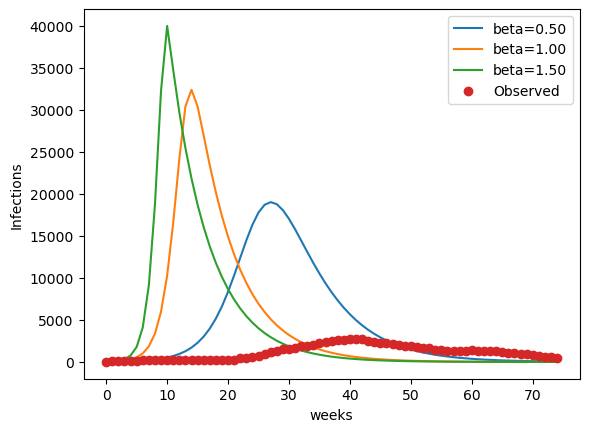

In [78]:
N_demo  = 50_000
S0_demo = N_demo - I0_obs - R0_obs
gamma_demo = 1/7

for beta_demo in [0.5, 1.0, 1.5]:
    S_test, I_test, R_test = euler_sir(beta_demo, gamma_demo, S0_demo, I0_obs, R0_obs, t_obs, N_demo)
    plt.plot(t_obs, I_test, label=f'beta={beta_demo:.2f}')

plt.plot(t_obs, I_obs, 'o', label='Observed')
plt.legend(); plt.xlabel('weeks'); plt.ylabel('Infections'); plt.show()

### Changing N=15000 and different beta values
Scaled the population (N) to fit the observed infection curve the best. Previously, using the 214 million population of Nigeria gave us unusable plots that scaled way to big. We scaled down to 15000 people which gives us a max I(t) of about 5k-6k people. We also had to change our beta value to fit the observed plot. Literature gives an approximate beta value of 1.9-2.1, however, in order to fit the observed I(t) graph, we had to scale beta all the way down to 0.3. This gives a basic reproduction number of ~1 which is no where accurate for measles. 

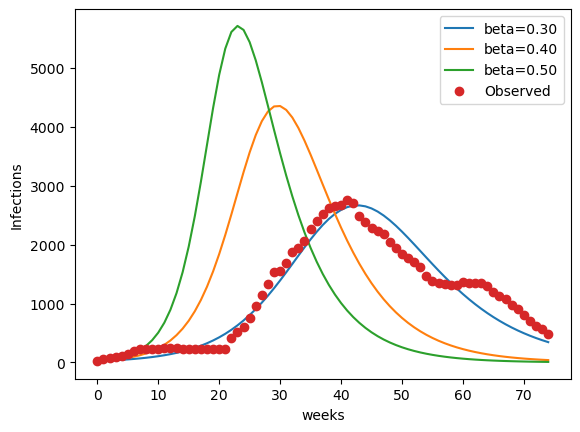

In [79]:
N_demo  = 15_000
S0_demo = N_demo - I0_obs - R0_obs
gamma_demo = 1/7

for beta_demo in [0.3, 0.4, 0.5]:
    S_t, I_t, R_t = euler_sir(beta_demo, gamma_demo, S0_demo, I0_obs, R0_obs, t_obs, N_demo)
    plt.plot(t_obs, I_t, label=f'beta={beta_demo:.2f}')
plt.plot(t_obs, I_obs, 'o', label='Observed')
plt.legend(); plt.xlabel('weeks'); plt.ylabel('Infections'); plt.show()

## Verify and validate your analysis: 

*(Describe how you checked to see that your analysis gave you an answer that you believe (verify). Describe how your determined if your analysis gave you an answer that is supported by other evidence (e.g., a published paper).*

## Conclusions and Ethical Implications: 
*(Think about the answer your analysis generated, draw conclusions related to your overarching question, and discuss the ethical implications of your conclusions.*

## Limitations and Future Work: 
*(Think about the answer your analysis generated, draw conclusions related to your overarching question, and discuss the ethical implications of your conclusions.*

## NOTES FROM YOUR TEAM: 
*This is where our team is taking notes and recording activity.*

## QUESTIONS FOR YOUR TA: 
*These are questions we have for our TA.*